# ML Quest #1: Demand Forecasting
https://www.patreon.com/ZazenCodes

## Part 1: Data Exploration and Cleaning

## Sections
1. Load & Clean Data
2. Check for Missing Values
3. Detect Anomalies and Outliers
4. Examine Temporal Coverage
5. Identify Class Imbalances
6. Visualize Time Series Data
7. Distribution and Normality Analysis


## Setup

We will be using importing libraries as needed throughout the notebook, as opposed to all at the top in one big chunk. If you have problems installing the full `requirements.txt` then I suggest installing libraries individually as they are needed. You can also try relaxing the versions (e.g. installing the latest versions).

In any case, you should be using a virtual environment. I am using Python 3.12.

Install virtual environment:

```bash
python -m venv venv
venv/bin/pip install -r requirements.txt
```

Use this virtual environment kernel for this notebook. If you are not using VS Code then you may need to install a system-wide kernel:

```bash
python -m venv venv
venv/bin/pip install --user ipykernel
venv/bin/python -m ipykernel install --user --name=ml_quest_1

# You can remove it later
jupyter kernelspec list
jupyter kernelspec uninstall ml_quest_1
```

In [7]:
!which python

/Users/alex/pro/zazencodes-courses/ml-quest-1-demand-forecasting/venv/bin/python


In [8]:
!python -c "import sys;print(sys.version_info)"

sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)


## 1. Load & Clean Data

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("../data/meal_demand_historical.csv")

In [11]:
df

,week_number,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,city_name,meal_name,meal_category,meal_type
0,1,136.83,152.29,0,0,177,2.0,Brackenbury,Mushroom Stew,Vegetarian,main
1,1,136.83,135.83,0,0,270,2.0,Brackenbury,Dwarven Meat Pie,Meat,main
2,1,134.86,135.86,0,0,189,2.0,Brackenbury,Dragonfire Chili,Meat,main
3,1,339.50,437.53,0,0,54,2.0,Brackenbury,Stuffed Mushrooms,Vegetarian,starter
4,1,243.50,242.50,0,0,40,2.0,Brackenbury,Grilled Trout with Lemon,Seafood,main
...,...,...,...,...,...,...,...,...,...,...,...
456543,145,484.09,484.09,0,0,68,4.5,Meadowbrook,Fire-Grilled Venison,Meat,main
456544,145,482.09,482.09,0,0,42,4.5,Meadowbrook,Forest Berry Pie,Other,dessert
456545,145,237.68,321.07,0,0,501,4.5,Meadowbrook,Savory Meat Pies,Meat,main
456546,145,243.50,313.34,0,0,729,4.5,Meadowbrook,Apple and Raisin Bread,Other,dessert


In [12]:
# Did everything load?
df.columns

Index(['week_number', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'op_area', 'city_name', 'meal_name',
       'meal_category', 'meal_type'],
      dtype='object')

In [13]:
# Do the data types look ok?
df.dtypes

week_number                int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                object
op_area                  float64
city_name                 object
meal_name                 object
meal_category             object
meal_type                 object
dtype: object

In [14]:
pd.to_numeric(df.num_orders)

ValueError: Unable to parse string "11,060" at position 16591

In [15]:
pd.to_numeric?

Signature:
pd.to_numeric(
    arg,
    errors: 'DateTimeErrorChoices' = 'raise',
    downcast: "Literal['integer', 'signed', 'unsigned', 'float'] | None" = None,
    dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>,
)
Docstring:
Convert argument to a numeric type.

The default return dtype is `float64` or `int64`
depending on the data supplied. Use the `downcast` parameter
to obtain other dtypes.

Please note that precision loss may occur if really large numbers
are passed in. Due to the internal limitations of `ndarray`, if
numbers smaller than `-9223372036854775808` (np.iinfo(np.int64).min)
or larger than `18446744073709551615` (np.iinfo(np.uint64).max) are
passed in, it is very likely they will be converted to float so that
they can be stored in an `ndarray`. These warnings apply similarly to
`Series` since it internally leverages `ndarray`.

Parameters
----------
arg : scalar, list, tuple, 1-d array, or Series
    Argument to be converted.
errors : {'ignore', 'raise', '

In [16]:
num_orders_numeric = pd.to_numeric(df.num_orders, errors="coerce")

In [17]:
num_orders_numeric

0         177.0
1         270.0
2         189.0
3          54.0
4          40.0
          ...  
456543     68.0
456544     42.0
456545    501.0
456546    729.0
456547    162.0
Name: num_orders, Length: 456548, dtype: float64

In [18]:
num_orders_numeric.isnull().sum()

np.int64(28)

## 2. Check for Missing Values

In [19]:
df.isnull().sum()

week_number               0
checkout_price            0
base_price                0
emailer_for_promotion     0
homepage_featured         0
num_orders               14
op_area                   0
city_name                 0
meal_name                 0
meal_category             0
meal_type                 0
dtype: int64

In [20]:
m

NameError: name 'm' is not defined

In [21]:
m = num_orders_numeric.isnull()
df[m].num_orders

16591     11,060
27827      1,620
51628        NaN
66543        NaN
111162     7,010
111520       NaN
127142     1,230
138870       NaN
155817     1,500
211085     3,770
211873       NaN
216135       NaN
242557       NaN
255237       NaN
273885       NaN
276673       NaN
297029     2,570
321632       NaN
345342     3,110
367468     1,770
373444     2,980
381071       NaN
396684     2,710
412975       NaN
418087     2,830
433686     3,660
440846     3,510
454438       NaN
Name: num_orders, dtype: object

In [22]:
df[m]

,week_number,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,city_name,meal_name,meal_category,meal_type
16591,6,234.74,445.23,0,1,"11,060",3.0,Zarendale,Spit-Roasted Quail,Meat,main
27827,10,581.03,581.03,0,0,"1,620",1.9,Fernwood,Spinach and Cheese Pastry,Vegetarian,starter
51628,19,213.43,338.53,0,0,NaN,5.3,Oakhaven,Honey-Roasted Carrots,Vegetarian,side
66543,24,316.28,315.28,0,0,NaN,3.9,Jadehaven,Honey-Roasted Carrots,Vegetarian,side
111162,38,321.13,320.13,0,0,"7,010",5.1,Kingsholm,Crab Cakes with Lemon Butter,Seafood,starter
111520,38,533.53,533.53,0,1,NaN,7.0,Brookhollow,Herb-Crusted Lamb,Meat,main
127142,44,388.03,464.63,1,1,"1,230",5.3,Oakhaven,Fire-Grilled Venison,Meat,main
138870,47,193.03,242.53,0,0,NaN,5.1,Ashenport,Salted Pork with Mustard,Meat,main
155817,53,680.03,679.03,0,0,"1,500",4.5,Driftwood,Garlic Roasted Potatoes,Vegetarian,side
211085,70,430.71,431.71,0,0,"3,770",3.5,Yewshade,Spit-Roasted Quail,Meat,main


In [23]:
m = df.num_orders.isnull()

In [24]:
df[m].num_orders

51628     NaN
66543     NaN
111520    NaN
138870    NaN
211873    NaN
216135    NaN
242557    NaN
255237    NaN
273885    NaN
276673    NaN
321632    NaN
381071    NaN
412975    NaN
454438    NaN
Name: num_orders, dtype: object

In [25]:
df.num_orders.fillna(method="ffill")[m]

/var/folders/bx/2xw9j1ps5d59rqp_x5g321sm0000gn/T/ipykernel_1937/3163638476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.num_orders.fillna(method="ffill")[m]


51628         269
66543         189
111520         40
138870         26
211873        109
216135         26
242557        324
255237         26
273885         26
276673         40
321632    4000000
381071        163
412975        581
454438        215
Name: num_orders, dtype: object

In [26]:
# Handle num orders better than "coerce" method above, and drop NaNs

def parse_num_orders(df):
    print(f"Length before parsing num_orders: {len(df)}")
    df["num_orders"] = df["num_orders"].fillna("").str.replace(",", "")
    null_orders = df["num_orders"] == ""
    df = df[~null_orders].copy()
    df["num_orders"] = pd.to_numeric(df["num_orders"])
    print(f"Length after parsing num_orders:  {len(df)}")
    return df

df = parse_num_orders(df)

Length before parsing num_orders: 456548
Length after parsing num_orders:  456534


In [27]:
df.dtypes

week_number                int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
op_area                  float64
city_name                 object
meal_name                 object
meal_category             object
meal_type                 object
dtype: object

In [28]:
df.isnull().sum()

week_number              0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
op_area                  0
city_name                0
meal_name                0
meal_category            0
meal_type                0
dtype: int64

## 3. Detect Anomalies and Outliers

In [29]:
# Anything unusual?
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week_number,456534.0,74.768613,4.152507e+01,1.00,39.00,76.00,111.00,1.450000e+02
checkout_price,456534.0,332.239431,1.529410e+02,2.97,228.95,296.82,445.23,8.662700e+02
base_price,456534.0,354.156831,1.607175e+02,55.35,243.50,310.46,458.87,8.662700e+02
emailer_for_promotion,456534.0,0.081151,2.730665e-01,0.00,0.00,0.00,0.00,1.000000e+00
homepage_featured,456534.0,0.109199,3.118889e-01,0.00,0.00,0.00,0.00,1.000000e+00
num_orders,456534.0,258087.446749,4.681222e+06,-3388.00,54.00,136.00,337.00,1.111000e+09
op_area,456534.0,4.083592,1.091662e+00,0.90,3.60,4.00,4.50,7.000000e+00


In [30]:
df.week_number.value_counts().sort_index()

week_number
1      2922
2      2896
3      2899
4      2889
5      2859
       ... 
141    3263
142    3238
143    3305
144    3302
145    3267
Name: count, Length: 145, dtype: int64

<Axes: xlabel='week_number'>

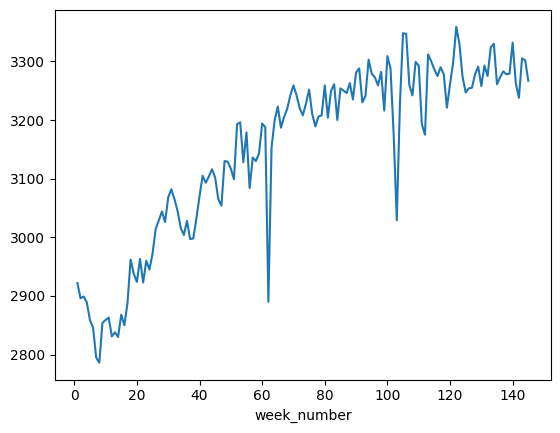

In [31]:
df.week_number.value_counts().sort_index().plot()

<Axes: xlabel='week_number'>

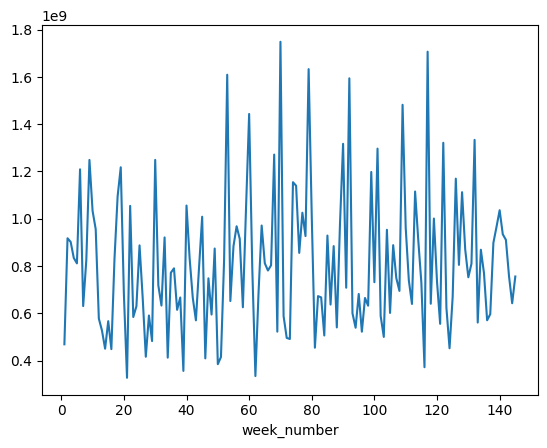

In [32]:
df.groupby("week_number").num_orders.sum().plot()

In [33]:
(df.base_price < 0).sum()

np.int64(0)

In [34]:
(df.checkout_price < 0).sum()

np.int64(0)

In [35]:
m = df.num_orders < 0
m.sum()

np.int64(55)

In [36]:
(df.num_orders < 0).sum()

np.int64(55)

In [37]:
df[df.num_orders < 0]

,week_number,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,city_name,meal_name,meal_category,meal_type
6592,3,305.58,306.58,0,0,-528,4.1,Duskbrook,Fish and Chips,Seafood,main
16561,6,447.23,447.23,0,0,-28,3.5,Yewshade,Duck Egg Omelette,Other,starter
25099,9,230.92,292.00,0,0,-216,4.1,Ironforge,Fish and Chips,Seafood,main
33691,12,455.93,456.93,0,0,-14,3.8,Jasperwood,Stuffed Mushrooms,Vegetarian,starter
37698,14,387.03,505.43,0,0,-41,4.0,Oakenspire,Fire-Grilled Venison,Meat,main
43864,16,161.05,233.77,0,0,-297,4.4,Ridgefield,Spiced Apple Tart,Other,dessert
63290,23,161.99,183.33,0,0,-459,2.0,Brackenbury,Beef and Ale Stew,Meat,main
84459,30,233.83,231.83,0,0,-80,3.8,Moonshadow,Salted Pork with Mustard,Meat,main
104609,36,281.33,281.33,0,0,-188,7.0,Stormwatch,Elven Salad with Nuts and Berries,Vegetarian,starter
108369,37,670.33,669.33,0,0,-80,3.9,Amberhill,Honey Mead,Other,beverage


<Axes: >

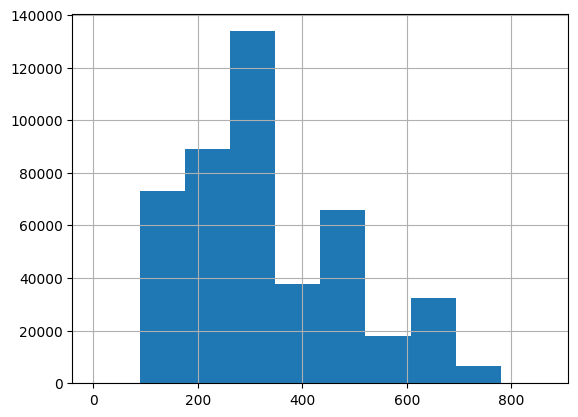

In [38]:
df.checkout_price.hist()

<Axes: >

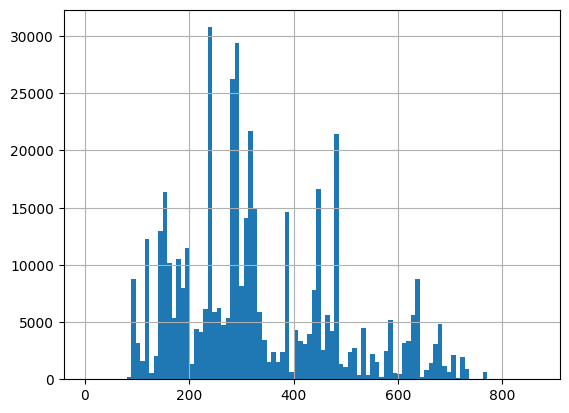

In [39]:
df.checkout_price.hist(bins=100)

<Axes: >

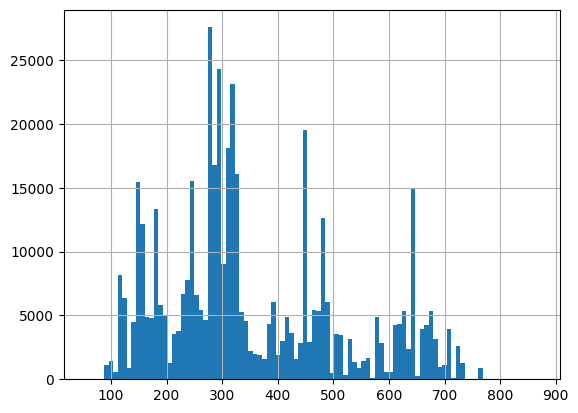

In [40]:
df.base_price.hist(bins=100)

<Axes: >

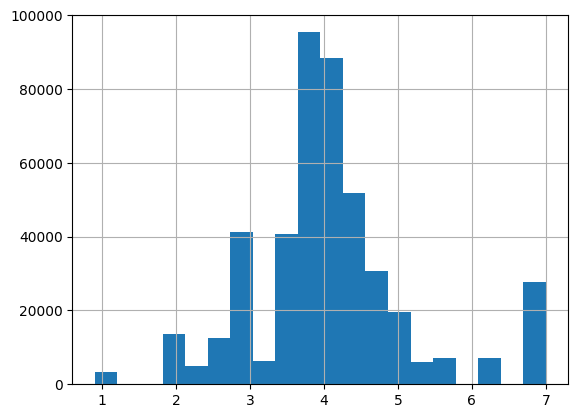

In [41]:
df.op_area.hist(bins=20)

<Axes: >

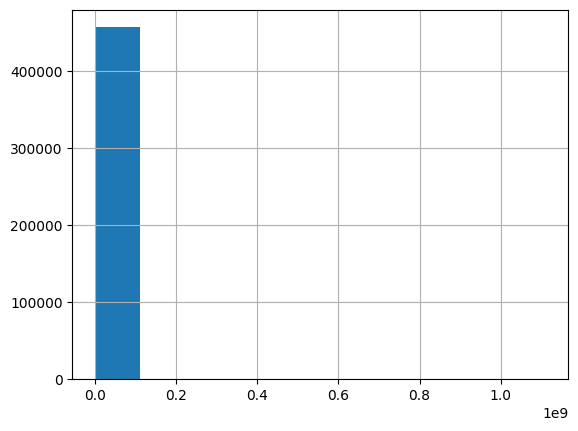

In [42]:
df.num_orders.hist()

<Axes: >

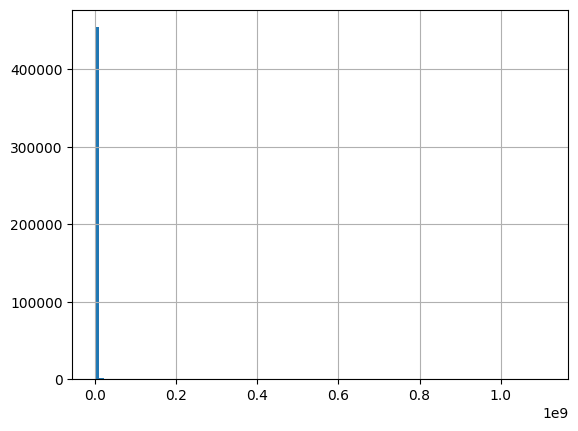

In [43]:
df.num_orders.hist(bins=100)

<Axes: >

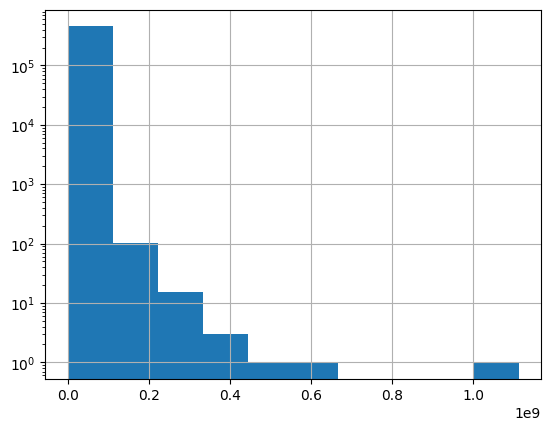

In [44]:
# Get more resolution
df.num_orders.hist(log=True)

In [45]:
# Determine outliers statistically
qts = df.quantile([0.05, 0.95], numeric_only=True)

In [46]:
qts.T

,0.05,0.95
week_number,8.00,139.00
checkout_price,121.28,640.23
base_price,144.53,668.33
emailer_for_promotion,0.00,1.00
homepage_featured,0.00,1.00
num_orders,14.00,972.00
op_area,2.70,6.70


In [47]:
for col, col_qts in qts.T.iterrows():
    print(col, col_qts.values)

week_number [  8. 139.]
checkout_price [121.28 640.23]
base_price [144.53 668.33]
emailer_for_promotion [0. 1.]
homepage_featured [0. 1.]
num_orders [ 14. 972.]
op_area [2.7 6.7]


In [48]:
for col, col_qts in qts.T.iterrows():
    if col in ("week_number", "emailer_for_promotion", "homepage_featured"):
        continue
    print(col)
    print(f"< 0.05 threshold: {col_qts.values[0]}")
    print(f"> 0.95 threshold: {col_qts.values[1]}")
    print(f"< 0.05: {(df[col] < col_qts.values[0]).sum()}")
    print(f"> 0.95: {(df[col] > col_qts.values[1]).sum()}")
    print(f"< 0.05: {(df[col] < col_qts.values[0]).sum() / len(df) * 100}%")
    print(f"> 0.95: {(df[col] > col_qts.values[1]).sum() / len(df) * 100}%")
    print("---")

checkout_price
< 0.05 threshold: 121.28
> 0.95 threshold: 640.23
< 0.05: 22283
> 0.95: 20827
< 0.05: 4.880907008021309%
> 0.95: 4.561982240096028%
---
base_price
< 0.05 threshold: 144.53
> 0.95 threshold: 668.33
< 0.05: 22174
> 0.95: 22209
< 0.05: 4.857031458774155%
> 0.95: 4.864697919541589%
---
num_orders
< 0.05 threshold: 14.0
> 0.95 threshold: 972.0
< 0.05: 12323
> 0.95: 22715
< 0.05: 2.699251315345626%
> 0.95: 4.975533038065072%
---
op_area
< 0.05 threshold: 2.7
> 0.95 threshold: 6.7
< 0.05: 22045
> 0.95: 20684
< 0.05: 4.828775074802753%
> 0.95: 4.530659271817652%
---


In [49]:
qts = df.quantile([0.001, 0.999], numeric_only=True)

for col, col_qts in qts.T.iterrows():
    if col in ("week_number", "emailer_for_promotion", "homepage_featured"):
        continue
    print(col)
    print(f"< 0.001 threshold: {col_qts.values[0]}")
    print(f"> 0.999 threshold: {col_qts.values[1]}")
    print(f"< 0.001: {(df[col] < col_qts.values[0]).sum()}")
    print(f"> 0.999: {(df[col] > col_qts.values[1]).sum()}")
    print(f"< 0.001 {(df[col] < col_qts.values[0]).sum() / len(df) * 100}%")
    print(f"> 0.999: {(df[col] > col_qts.values[1]).sum() / len(df) * 100}%")
    print("---")

checkout_price
< 0.001 threshold: 91.18
> 0.999 threshold: 765.33
< 0.001: 392
> 0.999: 440
< 0.001 0.08586436059526782%
> 0.999: 0.09637836393346388%
---
base_price
< 0.001 threshold: 94.09
> 0.999 threshold: 766.33
< 0.001: 344
> 0.999: 292
< 0.001 0.07535035725707176%
> 0.999: 0.06396018697402603%
---
num_orders
< 0.001 threshold: 13.0
> 0.999 threshold: 62000000.0
< 0.001: 55
> 0.999: 450
< 0.001 0.012047295491682986%
> 0.999: 0.09856878129558806%
---
op_area
< 0.001 threshold: 0.9
> 0.999 threshold: 7.0
< 0.001: 0
> 0.999: 0
< 0.001 0.0%
> 0.999: 0.0%
---


In [50]:
df[df.num_orders > 62000000.0].num_orders

140        63500000
3130      131100000
3139       76900000
3151       71600000
5674       79800000
            ...    
450293    189000000
452891     82400000
453842     89200000
454345     62100000
455486     75600000
Name: num_orders, Length: 450, dtype: int64

In [51]:
df.num_orders.sample(10)

68544      13
150774    823
68781      28
29420      13
54877      13
441586     55
89593      80
105393    647
181229     26
354297    811
Name: num_orders, dtype: int64

In [52]:
df.quantile([0.25, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999], numeric_only=True).num_orders.T

0.250          54.00
0.500         136.00
0.600         202.00
0.700         283.00
0.800         404.00
0.900         647.00
0.950         972.00
0.990        6902.76
0.995    13500000.00
0.999    62000000.00
Name: num_orders, dtype: float64

In [53]:
df.quantile([0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.999], numeric_only=True).num_orders.T

0.990    6.902760e+03
0.991    2.600000e+06
0.992    4.100000e+06
0.993    6.700000e+06
0.994    9.480200e+06
0.995    1.350000e+07
0.999    6.200000e+07
Name: num_orders, dtype: float64

In [54]:
max_num_orders = 6.902760e+03

<Axes: >

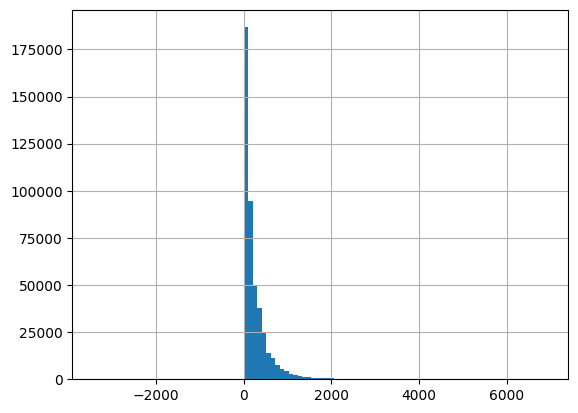

In [55]:
df[df.num_orders < max_num_orders].num_orders.hist(bins=100)

In [56]:
negative_orders = df.num_orders < 0
zero_orders = df.num_orders == 0
huge_orders = df.num_orders > max_num_orders

def clean_num_orders(df):
    print(f"Length before cleaning num_orders: {len(df)}")
    df = df[~(negative_orders | zero_orders | huge_orders)].copy()
    print(f"Length after cleaning num_orders:  {len(df)}")
    return df

df = clean_num_orders(df)

Length before cleaning num_orders: 456534
Length after cleaning num_orders:  451913


## 4. Examine Temporal Coverage

<Axes: xlabel='week_number'>

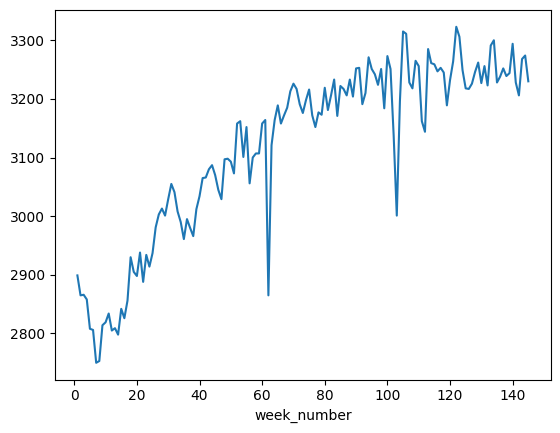

In [57]:
df.groupby("week_number").size().plot()

<Axes: xlabel='week_number'>

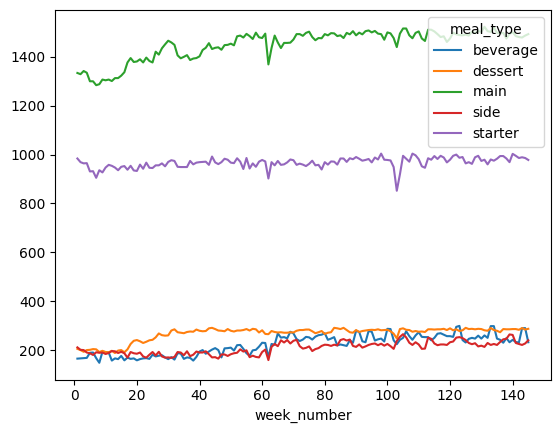

In [58]:
df.groupby(["meal_type", "week_number"]).size().unstack("meal_type").plot()

In [59]:
df.groupby(["city_name", "week_number"]).size().unstack("city_name")

city_name,Aldershade,Amberhill,Ashenport,Aspenfall,Brackenbury,Briarwood,Brightwater,Brookhollow,Candlekeep,Copperton,...,Vesperwood,Westfall,Willowgrove,Windridge,Winterhold,Xanadu,Yarrowford,Yewshade,Zarendale,Zephyrvale
week_number,,,,,,,,,,,,,,,,,,,,,
1,41.0,44.0,43.0,39.0,33.0,45.0,40.0,45.0,34.0,28.0,...,44.0,37.0,38.0,42.0,36.0,39.0,35.0,45.0,38.0,39.0
2,43.0,44.0,42.0,37.0,30.0,42.0,40.0,43.0,38.0,25.0,...,42.0,38.0,38.0,44.0,33.0,39.0,33.0,43.0,39.0,38.0
3,42.0,43.0,40.0,37.0,30.0,44.0,42.0,41.0,37.0,27.0,...,41.0,37.0,37.0,39.0,34.0,39.0,34.0,45.0,36.0,36.0
4,43.0,44.0,43.0,36.0,32.0,44.0,42.0,44.0,33.0,26.0,...,44.0,38.0,38.0,41.0,34.0,38.0,32.0,43.0,37.0,36.0
5,44.0,42.0,41.0,37.0,31.0,42.0,42.0,42.0,37.0,31.0,...,41.0,38.0,36.0,36.0,34.0,39.0,33.0,39.0,39.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,46.0,48.0,47.0,39.0,36.0,50.0,47.0,47.0,42.0,29.0,...,45.0,43.0,41.0,45.0,38.0,43.0,37.0,44.0,41.0,41.0
142,46.0,49.0,43.0,42.0,31.0,51.0,49.0,48.0,45.0,29.0,...,43.0,42.0,42.0,45.0,37.0,44.0,37.0,48.0,43.0,40.0
143,47.0,47.0,47.0,41.0,38.0,51.0,47.0,50.0,45.0,34.0,...,47.0,43.0,43.0,47.0,39.0,44.0,37.0,48.0,42.0,41.0


In [60]:
df.groupby(["city_name", "week_number"]).size().unstack("city_name") == 0

city_name,Aldershade,Amberhill,Ashenport,Aspenfall,Brackenbury,Briarwood,Brightwater,Brookhollow,Candlekeep,Copperton,...,Vesperwood,Westfall,Willowgrove,Windridge,Winterhold,Xanadu,Yarrowford,Yewshade,Zarendale,Zephyrvale
week_number,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
142,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
(df.groupby(["city_name", "week_number"]).size().unstack("city_name") == 0).sum().sum()

np.int64(0)

In [62]:
(df.groupby(["city_name", "week_number"]).size().unstack("city_name").isnull()).sum().sum()

np.int64(25)

In [63]:
(df.groupby(["city_name", "week_number"]).size().unstack("city_name").fillna(0) == 0).sum().sum()

np.int64(25)

In [64]:
(df.groupby(["city_name", "week_number"]).size().unstack("city_name").fillna(0) == 0).sum().sort_values(ascending=False)

city_name
Osprey Point    25
Aldershade       0
Pinewatch        0
Silverstone      0
Ridgefield       0
                ..
Hollowcrest      0
Hawthorn         0
Harrowdale       0
Greenshade       0
Zephyrvale       0
Length: 77, dtype: int64

<Axes: xlabel='week_number'>

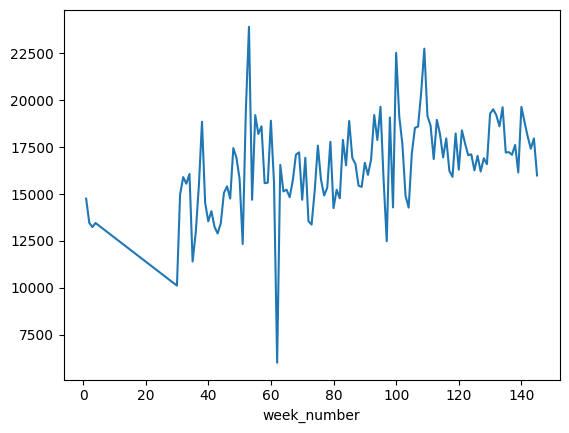

In [65]:
df[df.city_name == "Osprey Point"].groupby("week_number").num_orders.sum().plot()

In [66]:
# Examine low volume cities
(df.groupby(["city_name", "week_number"]).num_orders.sum().unstack("city_name") < 5000).sum().sort_values(ascending=False)

city_name
Elmswood        140
Fernwood        132
Nettlefield     122
Copperton       102
Kite's Nest      89
               ... 
Mirthwood         0
Oakhaven          0
Osprey Point      0
Quagmire          0
Zephyrvale        0
Length: 77, dtype: int64

In [67]:
import matplotlib.pyplot as plt

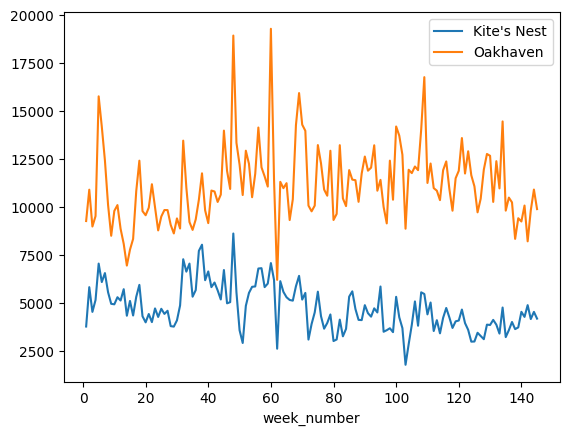

In [68]:
df[df.city_name == "Kite's Nest"].groupby("week_number").num_orders.sum().plot(label="Kite's Nest")
df[df.city_name == "Oakhaven"].groupby("week_number").num_orders.sum().plot(label="Oakhaven")
plt.legend()

In [69]:
def remove_low_temporal_coverage(df):
    print(f"Length before removing low temporal coverage records: {len(df)}")
    df = df[~df.city_name.isin(("Osprey Point",))].copy()
    print(f"Length after removing low temporal coverage records:  {len(df)}")
    return df

df = remove_low_temporal_coverage(df)

Length before removing low temporal coverage records: 451913
Length after removing low temporal coverage records:  446732


## 5. Identify Class Imbalances

<Axes: >

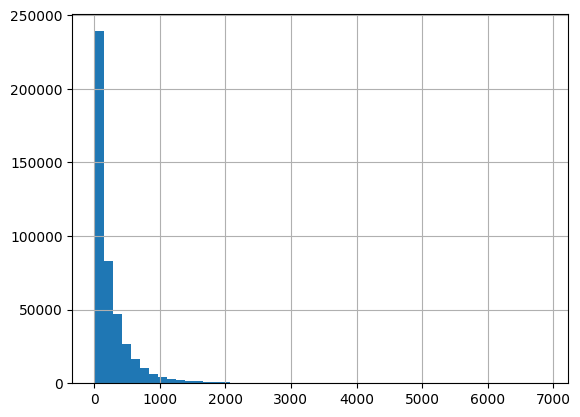

In [70]:
df.num_orders.hist(bins=50)

<Axes: >

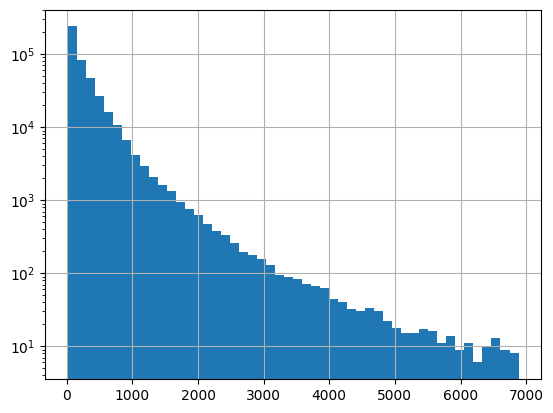

In [71]:
df.num_orders.hist(bins=50, log=True)

In [72]:
import numpy as np

<Axes: >

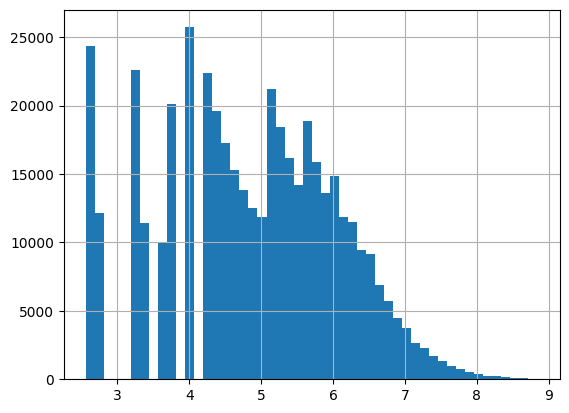

In [73]:
df.num_orders.apply(np.log).hist(bins=50)

In [74]:
df.emailer_for_promotion.value_counts() / len(df)

emailer_for_promotion
0    0.918851
1    0.081149
Name: count, dtype: float64

In [75]:
df.homepage_featured.value_counts() / len(df)

homepage_featured
0    0.890798
1    0.109202
Name: count, dtype: float64

In [76]:
df.city_name.value_counts()

city_name
Briarwood     6971
Greenshade    6952
Invermere     6922
Kingsholm     6874
Stormwatch    6840
              ... 
Harrowdale    4591
Pemberton     4447
Copperton     4326
Fernwood      4045
Elmswood      3397
Name: count, Length: 76, dtype: int64

In [77]:
df.meal_name.value_counts()

meal_name
Sage and Onion Porridge              10917
Fish and Chips                       10905
Spit-Roasted Quail                   10900
Beef and Ale Stew                    10893
Pumpkin Soup                         10893
Braised Oxen Tail                    10891
Baked Apple with Cinnamon            10875
Vegetable Stir-Fry                   10875
Dwarven Meat Pie                     10871
Mushroom Stew                        10855
Cheese and Onion Tart                10855
Garlic Roasted Potatoes              10843
Crab Cakes with Lemon Butter         10812
Pan-Seared Salmon                    10769
Spinach and Cheese Pastry            10735
Basil and Tomato Soup                10574
Wild Boar Ribs                       10536
Dwarven Ale Bread                    10523
Elven Salad with Nuts and Berries    10302
Grilled Trout with Lemon             10290
Dragonfire Chili                     10230
Fire-Grilled Venison                 10009
Salted Pork with Mustard              9994
V

In [78]:
len(df.meal_name.drop_duplicates())

51

In [79]:
df.meal_name.nunique()

51

In [80]:
df.meal_category.value_counts() / len(df)

meal_category
Meat          0.343998
Vegetarian    0.322036
Other         0.238212
Seafood       0.095753
Name: count, dtype: float64

In [81]:
df.meal_type.value_counts() / len(df)

meal_type
main        0.465559
starter     0.310732
dessert     0.085423
beverage    0.071237
side        0.067049
Name: count, dtype: float64

## 6. Visualize Time Series Data

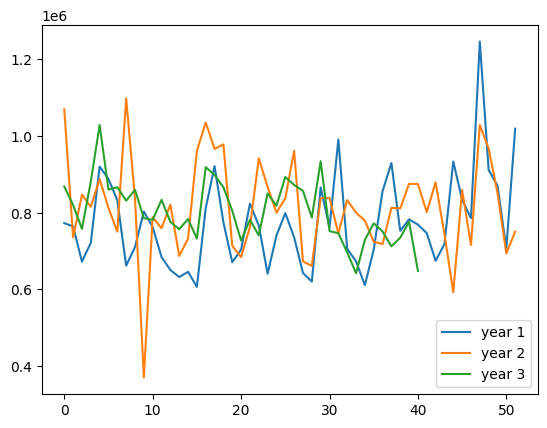

In [82]:
s = df.groupby("week_number").num_orders.sum()

s[:52].reset_index(drop=True).plot(label="year 1")
s[52:104].reset_index(drop=True).plot(label="year 2")
s[104:].reset_index(drop=True).plot(label="year 3")

plt.legend()

## 7. Distribution and Normality Analysis

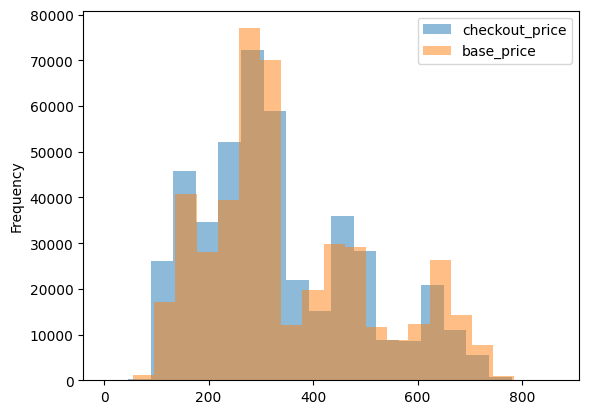

In [83]:
df.checkout_price.plot.hist(bins=20, alpha=0.5)
df.base_price.plot.hist(bins=20, alpha=0.5)
plt.legend()

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
price_scaler = StandardScaler()
checkout_price_normed = price_scaler.fit_transform(df.checkout_price.values.reshape(-1,1))
base_price_normed = price_scaler.transform(df.base_price.values.reshape(-1,1))

In [86]:
price_scaler = StandardScaler()

In [87]:
price_scaler.fit(df.checkout_price.values.reshape(-1,1))

StandardScaler()

In [88]:
price_scaler

StandardScaler()

In [89]:
price_scaler.transform(df.checkout_price.values.reshape(-1,1))

array([[-1.27752517],
       [-1.27752517],
       [-1.29040939],
       ...,
       [-0.61794447],
       [-0.57988042],
       [-0.26248378]])

In [90]:
checkout_price_normed.flatten()

array([-1.27752517, -1.27752517, -1.29040939, ..., -0.61794447,
       -0.57988042, -0.26248378])

/var/folders/bx/2xw9j1ps5d59rqp_x5g321sm0000gn/T/ipykernel_1937/2137718639.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


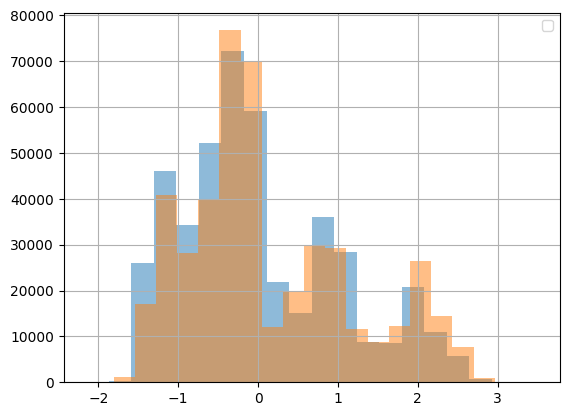

In [91]:
pd.Series(checkout_price_normed.flatten(), name="checkout_price_normed").hist(bins=20, alpha=0.5)
pd.Series(base_price_normed.flatten(), name="base_price_normed").hist(bins=20, alpha=0.5)
plt.legend()